In [36]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from tqdm import tqdm
from IPython.display import HTML

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable, functional
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchsummary import summary

import sys
sys.path.append('../src')
from model import *
from datagen import *

In [37]:
input_data = np.load("../datasets/gradual_2D_hdv_randomstart_5000_25_64.npy",allow_pickle=True)

In [38]:
class Datamodel(Dataset):
    def __init__(self,time_pos_points,labels):
        self.x = time_pos_points
        # self.y0 = time_pos_points[0][:,0,:]
        self.y = labels
    def __len__(self): 
        return self.x.shape[0]
    def __getitem__(self, ix):
        return self.x[ix], self.y[ix]

In [39]:
data = input_data[:,0]
labels = input_data[:,1]
datamodel = Datamodel(data, labels)

In [28]:
d,l = datamodel[100]

d.shape

torch.Size([64, 6, 2, 1])

In [40]:
data_loader = DataLoader(datamodel, batch_size=1, shuffle=False, num_workers=1)

In [41]:
for data,labels in data_loader:
    print(data.shape)
    print(labels.shape)
    break

torch.Size([1, 64, 2, 2, 1])
torch.Size([1, 64, 1, 2])


In [14]:
labels.shape

(5000,)

In [6]:
n = 100
path = input_data[n,1][:,:,:]
data = input_data[n,0][:,:,:].squeeze()
p0 = data[:,0,:]
p1 = path[0]
hd = data[:,1:,0]

In [7]:
path.shape

torch.Size([64, 5, 2])

In [73]:
hd.shape

torch.Size([64, 1])

In [75]:
dist_vec = path - p0.unsqueeze(1)
# hd_vec = torch.stack([np.cos(hd), np.sin(hd)])
dist = torch.norm(dist_vec, dim=1, keepdim=True)
dist_angle = torch.atan2(dist_vec[:,:,1], dist_vec[:,:,0])
rel_angle = torch.min(torch.remainder(dist_angle - hd, 2*np.pi), torch.remainder(hd - dist_angle, 2*np.pi))
dist.shape

torch.Size([64, 1, 2])

In [54]:
input_converted[4000,0][:,:,0].shape

torch.Size([64, 162, 1])

In [225]:
for i in range(len(input_data)):
    path = input_data[i,1][:,:,:]
    data = input_data[i,0][:,:,:].squeeze()
    p0 = data[:,0,:]
    hd = data[:,1:,0]
    dist_vec = path - p0.unsqueeze(1)
    dist = torch.norm(dist_vec, dim=2, keepdim=True)
    dist_angle = torch.atan2(dist_vec[:,:,1], dist_vec[:,:,0])
    # rel_angles = [torch.remainder(dist_angle - hd, 2*np.pi), torch.remainder(hd - dist_angle, 2*np.pi)]
    rel_angle = torch.minimum(torch.remainder(dist_angle - hd, 2*np.pi), torch.remainder(hd - dist_angle, 2*np.pi))
    # To make angle direction unique
    flip = torch.isclose(rel_angle,torch.remainder(dist_angle - hd, 2*np.pi))
    rel_angle = torch.where(flip, -rel_angle, rel_angle)
    input_data[i,1][:,:,0] = rel_angle
    input_data[i,1][:,:,1] = dist.squeeze(-1)


In [233]:
input_data[2,1][:,:,0].min()

tensor(-1.8908)

In [224]:
a = torch.stack([torch.Tensor([1,3]),torch.Tensor([4,5])])
b = torch.stack([torch.Tensor([3,6]),torch.Tensor([1,7])])
# amin = torch.argmin(torch.stack((a,b)),dim=0,keepdim=False)
# torch.stack((-a,b))[amin]
mins = torch.minimum(a,b)
aflip = (a==mins)
mins = torch.where(aflip,-mins,mins)
mins

tensor([[-1., -3.],
        [ 1., -5.]])

In [ ]:
p0 = np.array([1,-1])
p1 = np.array([0,1])
hd1 = 

In [446]:
import time

start = time.time()
t = int(np.sign(np.random.randint(0,2,(1,1))-0.5))
# t = torch.where(torch.randint(0,2,(2,2)) == 0, torch.ones((2,2)), -torch.ones((2,2)))
end = time.time()
print(f"Time ellapsed: {end - start:.10f}")
t

Time ellapsed: 0.0000000000


-1

In [567]:
basis1 = torch.tensor([np.cos(0), np.sin(0)])
basis2 = torch.tensor([np.cos(np.pi/3), np.sin(np.pi/3)])
basis3 = torch.tensor([np.cos(2*np.pi/3), np.sin(2*np.pi/3)])

basises = torch.stack([basis1, basis2, basis3], dim=0)

ts = torch.tensor([[1,0],[0,1],[1,1],[0,0]]).double()

torch.matmul(ts,basis2)

tensor([0.5000, 0.8660, 1.3660, 0.0000], dtype=torch.float64)

In [572]:
0**(1)

0

In [569]:
basises.shape

torch.Size([3, 2])

1.0 1.0 0.9999999999999999
1.0


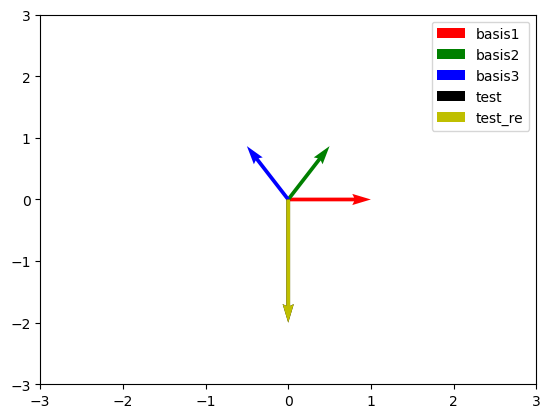

In [594]:
basis1 = np.array([np.cos(0), np.sin(0)])
basis2 = np.array([np.cos(np.pi/3), np.sin(np.pi/3)])
basis3 = np.array([np.cos(2*np.pi/3), np.sin(2*np.pi/3)])

print(np.linalg.norm(basis1), np.linalg.norm(basis2), np.linalg.norm(basis3))

test = np.array([np.cos(3*np.pi/2), np.sin(3*np.pi/2)])*2
test_norm = np.linalg.norm(test)

test_b1 = np.dot(test, basis1)*basis1*2/3
test_b2 = np.dot(test, basis2)*basis2*2/3
test_b3 = np.dot(test, basis3)*basis3*2/3

test_re = (test_b1 + test_b2 + test_b3)

print(np.linalg.norm(test_re)/np.linalg.norm(test))

# Plot vectors
plt.quiver(0, 0, basis1[0], basis1[1], angles='xy', scale_units='xy', scale=1, color='r')
plt.quiver(0, 0, basis2[0], basis2[1], angles='xy', scale_units='xy', scale=1, color='g')
plt.quiver(0, 0, basis3[0], basis3[1], angles='xy', scale_units='xy', scale=1, color='b')
plt.quiver(0, 0, test[0], test[1], angles='xy', scale_units='xy', scale=1, color='k')
plt.quiver(0, 0, test_re[0], test_re[1], angles='xy', scale_units='xy', scale=1, color='y')
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.legend(['basis1', 'basis2', 'basis3', 'test', 'test_re'])
plt.show()

In [517]:
torch.randn(1)*0.1+1

tensor([0.9253])

In [67]:
test = (0.49 > 0.5) | (-0.49 < -0.5) | (0.49 > 0.5) | (-0.49 < -0.5)
test

False

In [14]:
bools = torch.tensor([[True, False, True, False,True,True], [False, False, True, True,True,False], [False, False, False, False,False,False]])
bools_first_true = torch.zeros_like(bools)
# Find first True in each row
first_true = torch.argmax(bools.int(), dim=1)
bools_first_true[range(bools.shape[0]), first_true] = True
# bools[range(bools.shape[0]), first_true] = False
torch.logical_and(bools_first_true,bools)

tensor([[ True, False, False, False, False, False],
        [False, False,  True, False, False, False],
        [False, False, False, False, False, False]], device='cuda:0')

In [12]:
a = np.array([[1,2],[3,4],[5,6]])
a = a.T
a

array([[1, 3, 5],
       [2, 4, 6]])

In [87]:
a = torch.tensor([0.1,3*np.pi/2])
b = torch.tensor([2*np.pi-0.1,np.pi])

# b = np.pi
# a = 3*np.pi/2


# torch.min(torch.remainder(2*np.pi-torch.tensor([a-b]),2*np.pi),torch.remainder(2*np.pi-torch.tensor([b-a]),2*np.pi))
# torch.remainder(2*np.pi-torch.tensor(a-b),2*np.pi)
torch.min(torch.remainder(2*np.pi-(a-b),2*np.pi),torch.remainder(2*np.pi-(b-a),2*np.pi))

tensor([0.2000, 1.5708])

In [6]:
data,labels, path = datagen_lowetal_direct(100,21)

path

tensor([[6.2180, 0.1501, 0.0377,  ..., 3.8635, 3.5993, 3.7247],
        [5.9435, 0.0652, 5.6777,  ..., 2.8352, 2.1578, 1.7669],
        [0.7006, 0.3513, 0.7658,  ..., 2.0174, 2.2486, 1.9060],
        ...,
        [5.9948, 5.7847, 5.6895,  ..., 5.7073, 5.8450, 5.3386],
        [5.8313, 5.5819, 5.6002,  ..., 1.1775, 1.4078, 1.4631],
        [6.1537, 6.1682, 6.0541,  ..., 1.4431, 1.9224, 2.1347]])

In [2]:
hts = torch.tensor([0.0,-1.0])
x0 = torch.tensor([1.0,0.0])

torch.remainder(torch.acos(hts[0]/torch.linalg.norm(hts[:],dim=-1)),2*np.pi).T
torch.acos(hts[0]/torch.linalg.norm(hts[:],dim=-1))

C:\Users\matti\AppData\Local\Temp\ipykernel_4052\1993663843.py:4: UserWarning: Tensor.T is deprecated on 0-D tensors. This function is the identity in these cases. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\TensorShape.cpp:3586.)
  torch.remainder(torch.acos(hts[0]/torch.linalg.norm(hts[:],dim=-1)),2*np.pi).T


tensor(1.5708)

In [3]:
hts = np.array([0.0,1.0])
x0 = np.array([1.0,0.0])

np.arccos(np.clip(np.dot(hts/np.linalg.norm(hts), x0), -1.0, 1.0))

1.5707963267948966

In [4]:
x = torch.tensor([[-1.0,-0.01,0.0],[0.0,1.0,0.0],[0.0,0.0,1.0]])
torch.acos(x[:,0]/torch.norm(x[:,:],dim=-1))

tensor([3.1316, 1.5708, 1.5708])

In [5]:
angles = torch.tensor([3.2,3.0,0.0])
np.pi - torch.abs(angles - np.pi)

tensor([3.0832, 3.0000, 0.0000])

In [6]:
hts = torch.tensor([[[0.0,-1.0],[0.0,1.0]],[[0.0,-1.0],[0.0,1.0]]])
#

torch.acos(torch.clamp(hts[1:,:,0]/torch.clamp(torch.norm(hts[1:,:,:],dim=-1),min=0.00001),-1.0,1.0)).T

tensor([[1.5708],
        [1.5708]])

In [7]:
torch.acos(torch.clamp(torch.tensor([-2,2]),-1.0,1.0))

tensor([3.1416, 0.0000])

In [8]:
for i in range(1,1):
    print(i)

In [9]:
import numpy as np

i = np.arange(1,self.time_steps)
j = np.arange(1,min(self.time_steps//2-int(self.time_steps*0.1),i)+1)
angle_test = torch.abs(torch.acos(torch.clamp(torch.sum(y[i]*y[i-j],dim=-1)/(torch.norm(y[i],dim=-1)*torch.norm(y[i-j],dim=-1)),-1.0,1.0)))
angle_theoretical = y_hat[i]-y_hat[i-j]
angle_loss += np.mean((angle_test-angle_theoretical)**2)

NameError: name 'self' is not defined

In [13]:
y = torch.ones((64,20))
y = torch.concat((torch.zeros((64,1)),y),dim=1)
y.shape

torch.Size([64, 21])

In [14]:
a = torch.tensor([[1,2,3],[1,2,3]])
b = torch.tensor([[4,5,6],[4,5,6]])
torch.sum(a*b,dim=-1)

tensor([32, 32])

In [15]:
for i in range(1,time_steps):
    # Iterate through 1 to i followed up to time_steps//2 minus 10% of time_steps as explained in obsidian notes
    for j in range(1,min(time_steps//2-int(time_steps*0.1),i)+1):
        # print(y.shape,y_hat.shape)
        # Check angles between hts at time i and i-j
        # angle_test = torch.abs(torch.acos(torch.clamp(torch.sum(y[i]*y[i-j],dim=-1)/(torch.norm(y[i],dim=-1)*torch.norm(y[i-j],dim=-1)),-1.0,1.0)))
        normalizer = 1/(torch.norm(y[i],dim=-1)*torch.norm(y[i-j],dim=-1))
        # Check if y has any NaNs
        if y.isnan().any():
            print("y has NaNs")
        # Check if normalizer has any 0s
        if normalizer.isnan().any():
            print("normalizer has NaNs")
        angle_test = torch.abs(torch.acos(torch.clamp(torch.sum(y[i]*y[i-j],dim=-1)*normalizer,-0.9999,0.9999)))
        # Check if angle_test has any NaNs
        if angle_test.isnan().any():
            print("angle_test has NaNs")
        angle_theoretical = (y_hat[i]-y_hat[i-j])
        angle_loss += torch.mean((angle_test-angle_theoretical)**2)


NameError: name 'y_hat' is not defined

In [63]:
time_steps = 21

i = torch.arange(1, time_steps).unsqueeze(1)
j = torch.arange(1, time_steps//2-int(time_steps*0.1)).unsqueeze(0)
mask = (i >= j).long()

# j = j[mask]
# j = j.long()
# i = i.long()
# i-j
mask_dim2 = mask.shape[1]
mask_loss_scale = mask_dim2/mask.sum(dim=1).unsqueeze(1)
mask_loss_scale

tensor([[7.0000],
        [3.5000],
        [2.3333],
        [1.7500],
        [1.4000],
        [1.1667],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000]])

In [51]:
i = torch.arange(1,time_steps).unsqueeze(1)
j = torch.arange(1,time_steps//2-int(time_steps*0.1)).unsqueeze(0)
mask = (j <= i)
i = i*mask
j = j*mask

i.shape

torch.Size([20, 7])

In [17]:
i = torch.arange(1, time_steps).unsqueeze(1)
j = torch.arange(1, time_steps//2-int(time_steps*0.1)).unsqueeze(0)
mask = (i >= j).float()
j = j * mask
# Convert i and j to int
i = i.long()
j = j.long()
normalizer = 1 / (torch.norm(y[i], dim=-1) * torch.norm(y[i-j], dim=-1))
angle_test = torch.abs(torch.acos(torch.clamp(torch.sum(y[i]*y[i-j], dim=-1) * normalizer, -0.9999, 0.9999)))
angle_theoretical = (y_hat[i]-y_hat[i-j])
angle_loss = torch.mean((angle_test-angle_theoretical)**2)

NameError: name 'y_hat' is not defined

In [ ]:
for i in range(1,time_steps):
    for j in range(1,min(time_steps//2-int(time_steps*0.1),i)+1):
        normalizer = 1/(torch.norm(y[i],dim=-1)*torch.norm(y[i-j],dim=-1))
        angle_test = torch.abs(torch.acos(torch.clamp(torch.sum(y[i]*y[i-j],dim=-1)*normalizer,-0.9999,0.9999)))
        angle_theoretical = (y_hat[i]-y_hat[i-j])
        angle_loss += torch.mean((angle_test-angle_theoretical)**2)

In [21]:
batch_size = 64

data,labels = datagen_circular(batch_size,time_steps)
y_hat = labels.permute(1,0)
y_hat[:,0]

tensor([0.5459, 1.2050, 1.3522, 1.7030, 1.9419, 2.4670, 2.6512, 2.7493, 2.9576,
        3.1823, 3.3578, 3.5326, 3.9673, 4.2257, 4.6277, 4.8600, 4.9038, 5.5184,
        5.8235, 6.1041, 6.2832])

In [23]:
time_steps = 21

i = torch.arange(1, time_steps).unsqueeze(1)
j = torch.arange(1, time_steps//2-int(time_steps*0.1)).unsqueeze(0)
mask = (j <= i).float()
j = j * mask
# Convert i and j to int
i = i.long()
j = j.long()
# print(i)
# print(i-j)
# angle_theoretical = (y_hat[i]-y_hat[i-j])
# print(angle_theoretical[:,:,0])
# print(y_hat[:,0])

In [ ]:
((torch.abs(torch.sin(torch.tensor(2*np.pi))-torch.sin(torch.tensor(0))) + torch.abs(torch.cos(torch.tensor(2*np.pi))-torch.cos(torch.tensor(0))))**2).mean()

(-1.0998615404412626,
 1.0998615404412626,
 -1.0998665198505813,
 1.099856450275917)

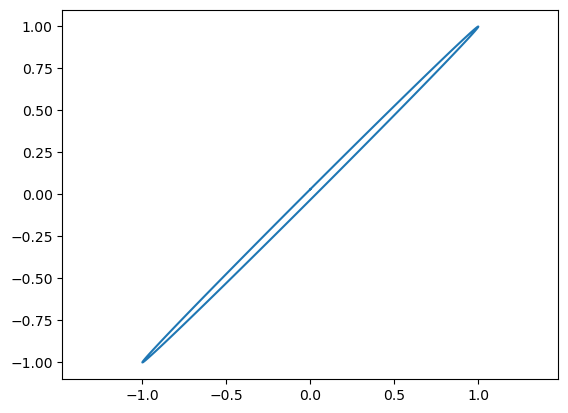

In [58]:
xs = np.linspace(0,2*np.pi,100)
plt.plot(np.sin(xs),np.sin(xs+np.pi/100))
plt.axis('equal')

In [60]:
# Sjekker om Wh beholder normen til x 
x = np.random.uniform(size=hidden_size)
# x_const = np.ones((100,100))
x_const = np.random.uniform(size=(100,hidden_size))
print("Norm av input:", np.linalg.norm(x))
print("Norm av Wh-skalert input",np.linalg.norm(Wh @ x), "ratio:", np.linalg.norm(Wh @ x)/np.linalg.norm(x))
# Finner utviklingen av normen av Wh-skalert input
for i in range(1,100):
    Wx = model1.input.weight.detach().numpy()
    Wx_norm = np.linalg.norm(Wx)
    x_const[i] = np.linalg.matrix_power(Wh,i) @ x_const[i]
    # x_const[i] = np.linalg.matrix_power(Wh,i) @ Wx.squeeze()*x[i]
    # x_const[i] = Wx_norm**i* Wh**i @ x_const[i]
plt.imshow(x_const)
pcm = plt.pcolor(x_const, norm = "log")
plt.colorbar(pcm)
# plt.colorbar()
plt.xlabel("Dimensjon")
plt.ylabel("Wh^i@x")
plt.show()

2

In [ ]:
for i in range(1,self.time_steps):
    # Iterate through 1 to i followed up to time_steps//2 minus 10% of time_steps
    for j in range(1,min(self.time_steps//2-int(self.time_steps*0.1),i)+1):
        # Check angles between hts at time i and i-j
        normalizer = 1/(torch.norm(y[i],dim=-1)*torch.norm(y[i-j],dim=-1))
        angle_test = torch.abs(torch.acos(torch.clamp(torch.sum(y[i]*y[i-j],dim=-1)*normalizer,-0.9999,0.9999)))
        angle_theoretical = (y_hat[i]-y_hat[i-j])
        angle_loss += torch.mean((angle_test-angle_theoretical)**2)